In [ ]:
from zipfile import ZipFile
# Path of ZIP file
f = "/content/drive/MyDrive/Khushi Rawat/Hindi character dtaset.zip"
# Use ZipFile to open and extract the contents of the ZIP file
with ZipFile(f,'r') as zip:
  zip.extractall()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.metrics import accuracy_score,classification_report
from keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Activation, Dropout, Flatten, Dense, BatchNormalization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from tqdm.notebook import tqdm

In [ ]:
# Train and Test Directory
train_dir = '/content/DevanagariHandwrittenCharacterDataset/Train'
test_dir = '/content/DevanagariHandwrittenCharacterDataset/Test'

In [ ]:
# Total number of classes in the dataset
classes = os.listdir(train_dir)
print("Length of the list : ",len(classes))
classes

Length of the list :  46


['character_22_pha',
 'character_10_yna',
 'digit_1',
 'character_29_waw',
 'character_17_tha',
 'character_21_pa',
 'character_9_jha',
 'character_31_petchiryakha',
 'character_33_ha',
 'character_11_taamatar',
 'digit_2',
 'digit_7',
 'character_15_adna',
 'digit_5',
 'character_34_chhya',
 'digit_4',
 'character_1_ka',
 'character_19_dha',
 'character_16_tabala',
 'character_36_gya',
 'character_35_tra',
 'character_23_ba',
 'digit_9',
 'digit_3',
 'character_24_bha',
 'character_12_thaa',
 'character_25_ma',
 'character_20_na',
 'character_4_gha',
 'character_18_da',
 'character_2_kha',
 'character_7_chha',
 'digit_0',
 'character_5_kna',
 'character_14_dhaa',
 'digit_6',
 'character_26_yaw',
 'character_6_cha',
 'character_27_ra',
 'character_32_patalosaw',
 'character_3_ga',
 'character_13_daa',
 'character_8_ja',
 'character_30_motosaw',
 'character_28_la',
 'digit_8']

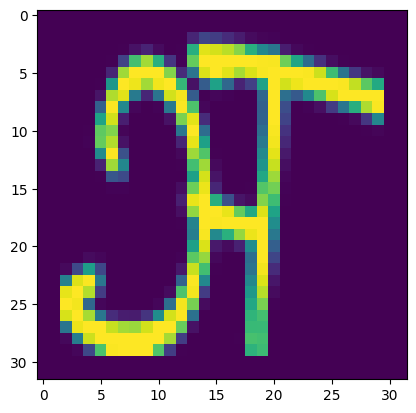

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load image
img = mpimg.imread('/content/DevanagariHandwrittenCharacterDataset/Train/character_10_yna/10542.png')

# Display image
plt.imshow(img)
plt.show()

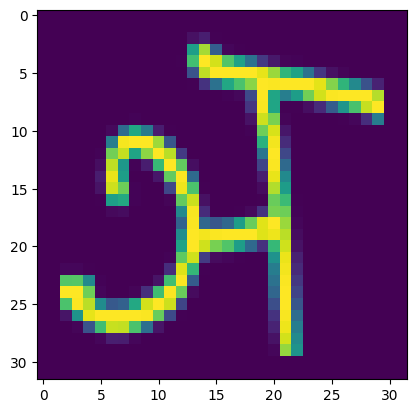

In [ ]:
# Load image
img = mpimg.imread('/content/DevanagariHandwrittenCharacterDataset/Train/character_10_yna/10576.png')

# Display image
plt.imshow(img)
plt.show()

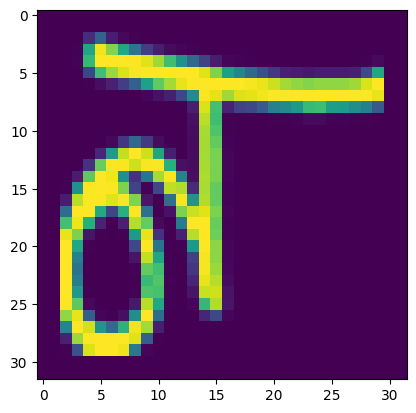

In [ ]:
# Load image
img = mpimg.imread('/content/DevanagariHandwrittenCharacterDataset/Train/character_20_na/11061.png')

# Display image
plt.imshow(img)
plt.show()

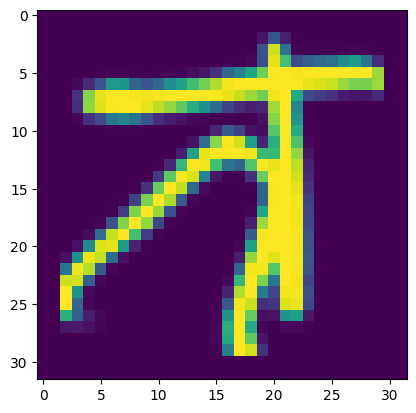

In [ ]:
# Load image
img = mpimg.imread('/content/DevanagariHandwrittenCharacterDataset/Train/character_35_tra/102522.png')

# Display image
plt.imshow(img)
plt.show()

In [ ]:
hindi_character = 'ञ ट ठ ड ढ ण त थ द ध क न प फ ब भ म य र ल व ख श ष स ह ॠ त्र ज्ञ ग घ ङ च छ ज झ ० १ २ ३ ४ ५ ६ ७ ८ ९'.split()


In [ ]:
# Generating Class label
# The names of each character, in the correct order for the Hindi Devnagri script
class_names='''character_1_ka character_2_kha character_3_ga charajcter_4_gha character_5_kna character_6_cha character_7_chha
character_8_ja character_9_jha character_10_yna character_11_taamatar character_12_thaa character_13_daa character_14_dhaa
character_15_adna character_16_tabala character_17_tha character_18_da character_19_dha character_20_na character_21_pa
character_22_pha character_23_ba character_24_bha character_25_ma character_26_yaw character_27_ra character_28_la
character_29_waw character_30_motosaw character_31_petchiryakha character_32_patalosaw character_33_ha character_34_chhya
character_35_tra character_36_gya digit_0 digit_1 digit_2 digit_3 digit_4 digit_5 digit_6 digit_7 digit_8 digit_9'''.split()

hindi_character = 'क ख ग घ ङ च छ ज झ ञ ट ठ ड ढ ण त थ द ध न प फ ब भ म य र ल व श ष स ह ॠ त्र ज्ञ ० १ २ ३ ४ ५ ६ ७ ८ ९'.split()


In [ ]:
# Creating Batches

#Import the data from the directories, then transform them into batches
training_dataset = image_dataset_from_directory(directory=train_dir,
                                                image_size=(32,32),
                                                batch_size=32,
                                                label_mode='categorical')

testting_dataset = image_dataset_from_directory(directory=test_dir,
                                                image_size=(32,32),
                                                batch_size=32,
                                                label_mode='categorical',
                                                shuffle=False)

Found 78200 files belonging to 46 classes.
Found 13800 files belonging to 46 classes.


In [ ]:
# Architechture of the CNN
model_1 = tf.keras.Sequential([
    tf.keras.Sequential([layers.Rescaling(1./255)]),

    # Layer1
    layers.Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.AveragePooling2D(),

    # Layer2
    layers.Conv2D(filters=16, kernel_size=(5, 5), activation='relu'),
    layers.BatchNormalization(),
    layers.AveragePooling2D(),

    # Flatten the array
    layers.Flatten(),

    # Fully Connected Layer 1
    layers.Dense(120, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),  # Adjust dropout rate as needed

    # Fully Connected Layer 2
    layers.Dense(84, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    # Fully Connected Layer 3
    layers.Dense(len(classes), activation='softmax')
])


In [ ]:
# Compile Model
model_1.compile(loss = 'categorical_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy'])

In [ ]:
# Model fitting on the loaded dataset
model_1_history = model_1.fit(training_dataset,
                              validation_data = testting_dataset,
                        epochs = 10 ,)

Epoch 1/10
2444/2444 [==============================] - 102s 40ms/step - loss: 1.4603 - accuracy: 0.5956 - val_loss: 0.3440 - val_accuracy: 0.8993
Epoch 2/10
2444/2444 [==============================] - 99s 41ms/step - loss: 0.5920 - accuracy: 0.8245 - val_loss: 0.2099 - val_accuracy: 0.9346
Epoch 3/10
2444/2444 [==============================] - 102s 42ms/step - loss: 0.4590 - accuracy: 0.8623 - val_loss: 0.1562 - val_accuracy: 0.9522
Epoch 4/10
2444/2444 [==============================] - 97s 40ms/step - loss: 0.3914 - accuracy: 0.8842 - val_loss: 0.1431 - val_accuracy: 0.9564
Epoch 5/10
2444/2444 [==============================] - 94s 38ms/step - loss: 0.3460 - accuracy: 0.8978 - val_loss: 0.1438 - val_accuracy: 0.9549
Epoch 6/10
2444/2444 [==============================] - 94s 38ms/step - loss: 0.3177 - accuracy: 0.9045 - val_loss: 0.1247 - val_accuracy: 0.9627
Epoch 7/10
2444/2444 [==============================] - 97s 40ms/step - loss: 0.3006 - accuracy: 0.9109 - val_loss: 0.1153

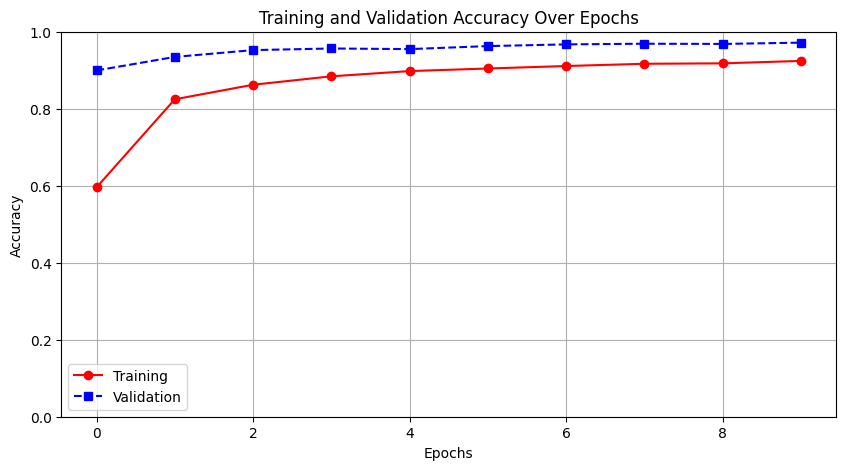

In [ ]:
# graph of validation loss and training data accuracy
#x-axis represents the epochs, the y-axis represents the accuracy, and it
# shows both the training and validation accuracy.


import matplotlib.pyplot as plt

plt.figure(1, figsize=(10, 5))

# Plot the training accuracy with a red line, solid line style, and circle marker
plt.plot(model_1_history.history['accuracy'], color='red', linestyle='-', marker='o', label='Train')

# Plot the validation accuracy with a blue line, dashed line style, and square marker
plt.plot(model_1_history.history['val_accuracy'], color='blue', linestyle='--', marker='s', label='Validation')

# Set labels for x and y axis
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
#set the plot title
plt.title('Training and Validation Accuracy Over Epochs')

# Add grid lines
plt.grid(True)

# Limit y-axis range
plt.ylim(0, 1)

# Add a legend
plt.legend(['Training', 'Validation'])

# Show the plot
plt.show()


In [ ]:
#image classification

model = Sequential([layers.Rescaling(1./255),])

#Layer1
model.add(Convolution2D(filters = 32,
			kernel_size = (3,3),
			strides = 1,
			activation = "relu",
			input_shape = (32,32,1)))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),
			strides=(2, 2),
			padding="same"))

#Layer2
model.add(Convolution2D(filters = 32,
			kernel_size = (3,3),
			strides = 1,
			activation = "relu",
			input_shape = (32,32,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),
			strides=(2, 2),
			padding="same"))


#Layers 3
model.add(Convolution2D(filters = 64,
			kernel_size = (3,3),
			strides = 1,
			activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),
			strides=(2, 2),
			padding="same"))


#Layer 4
model.add(Convolution2D(filters = 64,
			kernel_size = (3,3),
			strides= 1,
			activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),
			strides=(2, 2),
			padding="same"))
model.add(Flatten())

#Fully Connected Layer 1
model.add(Dense(128,
		activation = "relu",
		kernel_initializer = "uniform"))
model.add(BatchNormalization())

#Fully Connected Layer 2
model.add(Dense(64,
		activation = "relu",
		kernel_initializer = "uniform"))
model.add(BatchNormalization())

#Fully Connected Layer 3
model.add(Dense(46,
		activation = "softmax",
		kernel_initializer = "uniform"))

In [ ]:

# Compile Model
model.compile(loss = 'categorical_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy'])

In [ ]:
# Model fitting on the loaded dataset
# During each epoch, the model learns from the training dataset and evaluates
#its performance on the validation data.
model_history = model.fit(training_dataset,
                              validation_data = testting_dataset,
                        epochs = 10,)

In [ ]:

import cv2
import matplotlib.pyplot as plt
test_img = cv2.imread("/content/DevanagariHandwrittenCharacterDataset/Test/character_10_yna/10544.png")
plt.imshow(test_img)
test_img = cv2.resize(test_img,(32,32))
test_input = test_img.reshape((1,32,32,3))
model.predict(test_input)
predicted_probability = model.predict(test_input , verbose=1)
predicted_class = predicted_probability.argmax(axis=1)
class_number = predicted_class[0]
print("Actual_class : छ")
print("Predicted Class : " ,hindi_character[class_number])

In [ ]:
test_img_2 = test_img = cv2.imread("/content/DevanagariHandwrittenCharacterDataset/Test/character_10_yna/10544.png")
plt.imshow(test_img_2)
test_img_2 = cv2.resize(test_img_2,(32,32))
test_input = test_img_2.reshape((1,32,32,3))
model.predict(test_input)
predicted_probability = model.predict(test_input , verbose=1)
predicted_class = predicted_probability.argmax(axis=1)
class_number = predicted_class[0]
print("Actual_class : 1")
print("Predicted Class : " ,hindi_character[class_number])